This notebook allows to build `DataPreparator` object from a dataset.

In [1]:
import jyquickhelper
jyquickhelper.add_notebook_menu(first_level=1, last_level=3, header="Dataset preparation with DatasetPreparator")

# <font color=blus>0. Notebook configuration</font>

In [8]:
%load_ext autoreload
%autoreload 2

%reload_ext autoreload

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
import gensim
from gensim import corpora

import pandas as pd
import numpy as np

import p9_util

# Full dataset
#extension='_full'

# Partial dataset
extension='_part'

# <font color=blus>1. Load datasets</font>

    Processing data is intended in splitting train dataset into new train and test dataset.
    This is done in order to train a model that we expect to generalize over provided test dataset.
    
    Provided test dataset is a file holding a collection of documents. Predictions, in term of probability 
    of toxicity, will be applied on this test dataset thanks to the estimator trained with train dataset.
    
    

In [3]:
import pandas as pd

df_test = pd.read_csv('./data/test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
df_train = pd.read_csv('./data/train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

df_train['comment_text'] = df_train['comment_text'].apply(lambda x : x.lower())

## <font color=blus>1.1. Split data as train and test dataset</font>

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train['comment_text'],df_train['target'],test_size=0.33, random_state=42)

print("Train dataset: X = {} Label= {}".format(X_train.shape, y_train.shape))
print("Test dataset:  X = {} Label= {}".format(X_test.shape,  y_test.shape))

Train dataset: X = (1209265,) Label= (1209265,)
Test dataset:  X = (595609,) Label= (595609,)


In [31]:
import random

print("")
index_train_ref = random.randint(0,X_train.shape[0])
print("Train Reference index = {}".format(index_train_ref))

index_test_ref = random.randint(0,X_test.shape[0])
print("Test Reference index  = {}".format(index_test_ref))


print(X_train.iloc[index_train_ref])
print(y_train.iloc[index_train_ref])
print("")
print(X_test.iloc[index_test_ref])
print(y_test.iloc[index_test_ref])


may this us seal rest in peace! he made the ultimate sacrifice while in service to our country.
0.0

it's all about the publicity.
0.0


## <font color=blus>1.2. Backup / restore train and test dataset </font>

In [1]:
import pandas as pd
import p5_util

filename_train = './data/df_train.dump'
filename_test  = './data/df_test.dump'

if False: 
    df_train = pd.DataFrame({'X':X_train, 'y':y_train})
    df_test  = pd.DataFrame({'X':X_test, 'y':y_test})
    
    p5_util.object_dump(df_train,filename_train)
    p5_util.object_dump(df_test,filename_test)
    
else : 
    df_train = p5_util.object_load(filename_train)
    df_test  = p5_util.object_load(filename_test)

print("")
print("Shape of train corpus : = {}".format(df_train.shape))
print("Shape of test corpus  : = {}".format(df_test.shape))

p5_util.object_load : fileName= ./data/df_train.dump
p5_util.object_load : fileName= ./data/df_test.dump

Shape of train corpus : = (1209265, 2)
Shape of test corpus  : = (595609, 2)


In [7]:
try :
    del(X_train)
    print("Object deleted!")
except NameError:
    print("Object not defined!")
try :
    del(X_test)
    print("Object deleted!")
except NameError:
    print("Object not defined!")


Object not defined!
Object not defined!


In [8]:
df_test.iloc[0].X

'what a breathe of fresh air to have someone who embraces common sense values, instead of the leadership we have in canada, that is clearly on a different page, perhaps reading from a different book.'

# <font color=blus>2. Data preparation with `DataPreparator`</font>

## <font color=blus>2.1. Building train dataset `DataPreparator`</font>

In [7]:
import DataPreparator

dataPreparator_train = DataPreparator.DataPreparator(min_doc_len=4)

if dataPreparator_train.is_spacy_vectorizer:
    vectorizer_name = 'spacy'
if dataPreparator_train.is_keras_vectorizer:
    vectorizer_name = 'keras'
vectorizer_name

/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
W0826 22:05:44.898291 140018011993920 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0826 22:05:44.899075 140018011993920 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W0826 22:05:44.913144 14001801199392

'spacy'

In [8]:
sample_count = 15000

In [9]:
X_train,y_train = dataPreparator_train.fit_transform(df_train.X[:sample_count].values,y= df_train.y[:sample_count].values)

print(X_train.shape, y_train.shape)

fit : list_word_most_frequent length= 100

*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_util_spacy.spacy_tokenizer() : tokens issued from spacy tokenizer= 0    []
Name: tokens, dtype: object

*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_util_spacy.spacy_tokenizer() : tokens issued from spacy tokenizer= 0    []
Name: tokens, dtype: object

*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_util_spacy.spacy_tokenizer() : tokens issued from spacy tokenizer= 0    []
Name: tokens, dtype: object

*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_u


*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_util_spacy.spacy_tokenizer() : tokens issued from spacy tokenizer= 0    []
Name: tokens, dtype: object

*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_util_spacy.spacy_tokenizer() : tokens issued from spacy tokenizer= 0    []
Name: tokens, dtype: object

*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_util_spacy.spacy_tokenizer() : tokens issued from spacy tokenizer= 0    []
Name: tokens, dtype: object

*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_util_spacy.spacy_tokenizer() : tokens issue

## <font color=blus>2.2. Save train dataset `DataPreparator`</font>

In [10]:
import numpy as np
import p5_util

filename_train = './data/DataPreparator_train'+'_'+vectorizer_name+'_'+str(sample_count)+'.dump'

if True :
    p5_util.object_dump(dataPreparator_train,filename_train)
else : 
    dataPreparator_train = p5_util.object_load(filename_train)
    
print("")
print("DataPretarator train lenth= {}".format(len(dataPreparator_train)))



DataPretarator train lenth= 13623


In [11]:
dataPreparator_train.df_data.sample()

,docs,tokens,counting,vector,target
10830,the difference is if you were seated next to a...,"[difference, seat, white, bum, not, leap, conc...",43,"[-0.07474091980606318, -0.008813340539733568, ...",0.0


## <font color=blus>2.3. Building test dataset `DataPreparator`</font>

In [12]:
dataPreparator_test = DataPreparator.DataPreparator(other=dataPreparator_train)
X_test,y_test = dataPreparator_test.fit_transform(df_test.X[:sample_count].values,y= df_test.y[:sample_count].values)

fit : list_word_most_frequent length= 100

*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_util_spacy.spacy_tokenizer() : tokens issued from spacy tokenizer= 0    []
Name: tokens, dtype: object

*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_util_spacy.spacy_tokenizer() : tokens issued from spacy tokenizer= 0    []
Name: tokens, dtype: object

*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_util_spacy.spacy_tokenizer() : tokens issued from spacy tokenizer= 0    []
Name: tokens, dtype: object

*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_u


*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_util_spacy.spacy_tokenizer() : tokens issued from spacy tokenizer= 0    []
Name: tokens, dtype: object

*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_util_spacy.spacy_tokenizer() : tokens issued from spacy tokenizer= 0    []
Name: tokens, dtype: object

*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_util_spacy.spacy_tokenizer() : tokens issued from spacy tokenizer= 0    []
Name: tokens, dtype: object

*** ERROR : p9_util_spacy.spacy_tokenizer() : list index out of range
p9_util_spacy.spacy_tokenizer() : df_data[p9_util_spacy.COLUMN_NAME_TOKEN].tolist()= []
p9_util_spacy.spacy_tokenizer() : tokens issue

In [13]:
print(X_test.shape,y_test.shape)
dataPreparator_test.df_data.sample()

(13616, 300) (13616,)


,docs,tokens,counting,vector,target
12625,i think you response is a little harsh . the...,"[think, response, little, harsh, entire, syste...",29,"[-0.13055219779411953, 0.05068325423945983, 0....",0.0


## <font color=blus>2.4. Save test dataset `DataPreparator`</font>

In [14]:
import numpy as np
import p5_util

filename_test = './data/DataPreparator_test'+'_'+vectorizer_name+'_'+str(sample_count)+'.dump'

if True :
    p5_util.object_dump(dataPreparator_test,filename_test)
else : 
    dataPreparator_test = p5_util.object_load(filename_test)
    
print("")
print("DataPretarator test lenth=  {}".format(len(dataPreparator_test)))



DataPretarator test lenth=  13616


In [15]:
dataPreparator_train.df_data.sample(3)

,docs,tokens,counting,vector,target
9289,"where 's the tax return , trump ? \n\n palin -...","[tax, return, trump, american, forgive, not, r...",10,"[-0.059697292372584344, 0.026748561039566993, ...",0.166667
7407,"another biased , hate - filled , loud , bombas...","[biased, hate, fill, loud, bombastic, angry, g...",23,"[-0.10377996067206065, 0.027218689469931025, -...",0.600000
11171,there are profound differences between the ken...,"[profound, difference, kennedy, communication,...",24,"[-0.12927806040892997, 0.056012253140409786, 0...",0.000000


# <font color=blus>3. Dataset analysis</font>

## <font color=blus>3.1. Tokens length statistics</font>

count    4593.000000
mean       27.991291
std        23.849611
min         4.000000
25%        10.000000
50%        20.000000
75%        39.000000
max       129.000000
Name: counting, dtype: float64
 
Max train document length= 129


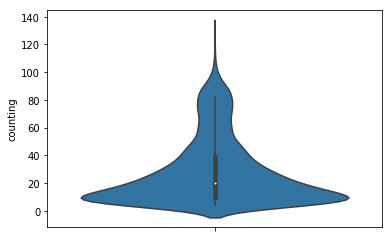

In [24]:
import seaborn as sns
count_column_name = dataPreparator_train.COLUMN_NAME_COUNT

print(dataPreparator_train.df_data[count_column_name].describe())
z_=sns.violinplot( y=dataPreparator_train.df_data[count_column_name] )
max_train_len = dataPreparator_train.df_data[count_column_name].max()
print(" ")
print("Max train document length= {}".format(max_train_len))

count    4581.000000
mean       27.840428
std        23.512100
min         4.000000
25%        10.000000
50%        20.000000
75%        38.000000
max       114.000000
Name: counting, dtype: float64
 
Max train document length= 114


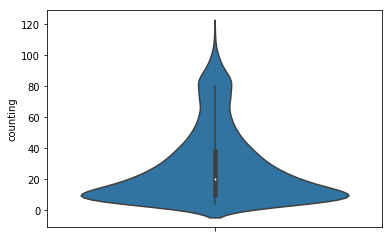

In [25]:
import seaborn as sns
count_column_name = dataPreparator_test.COLUMN_NAME_COUNT

print(dataPreparator_test.df_data[count_column_name].describe())
z_=sns.violinplot( y=dataPreparator_test.df_data[count_column_name] )
max_train_len = dataPreparator_test.df_data[count_column_name].max()
print(" ")
print("Max train document length= {}".format(max_train_len))

    Both, train and test datasets have approximatively same distribution considering text length.

    Considering above distribution, text max_length is the value in a such way 100% of dataset is processed.
    

## <font color=blus>3.2. Corpus toxicity distribution analysis</font>

    Analysis of ratio of toxic texts in corpus, each for test and train dataset.
    Text is regarded as toxic when target score is >0.
    This means, toxicity intensity is not taken into account.

In [12]:
import numpy as np

column_name = dataPreparator_train.COLUMN_NAME_TARGET
y_train_truncated = np.array(dataPreparator_train.df_data[column_name].tolist())
y_test_truncated = np.array(dataPreparator_test.df_data[column_name].tolist())

In [13]:
import numpy  as np

print("Percentage of toxics texts from train dataset= {0:.2f}%".format(100*len(np.where(y_train_truncated > 0.)[0])/len(y_train_truncated)))
print("Percentage of toxics texts from test dataset=  {0:.2f}%".format(100*len(np.where(y_test_truncated > 0.)[0])/len(y_test_truncated)))

Percentage of toxics texts from train dataset= 31.10%
Percentage of toxics texts from test dataset=  31.03%


    Let's consider toxic texts with a target score > 0.3 : 

In [14]:
import numpy  as np
score_threshold = 0.3
print("Percentage of toxics texts > {1} from train dataset= {0:.2f}%".format(100*len(np.where(y_train_truncated > score_threshold)[0])/len(y_train_truncated), score_threshold))
print("Percentage of toxics texts > {1} from test dataset=  {0:.2f}%".format(100*len(np.where(y_test_truncated > score_threshold)[0])/len(y_test_truncated), score_threshold))

Percentage of toxics texts > 0.3 from train dataset= 11.67%
Percentage of toxics texts > 0.3 from test dataset=  11.44%


    On the display above, for both train and test datasets, there is the same percentage of toxics texts.

    Let's convert target values as int ranging from 0 to 10.
    This is done for the easy of representation of the toxic distribution.

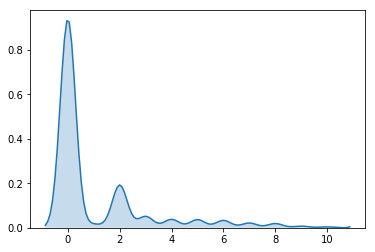

In [35]:
import seaborn as sns

_ = sns.kdeplot(np.ndarray.astype(np.round(y_train_truncated*10),int), shade=True)

    It can be shown that :
        --> Free toxic texts are the most frequent state into discussions.
        --> Highly toxic texts are very few in discussions.
        --> Frequency of toxic texts decreases along with toxicity intensity.
        
    Data model is not balanced between free toxic texts (mostly 90%) and texts with toxicity indicator value >0.
    
    This may lead to some hardness when for training an algorithm to predict toxicity values with so few 
    toxic samples.
    
        

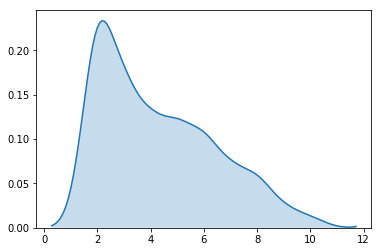

In [36]:
import seaborn as sns

score_threshold =0.2
arr_index = np.where(np.array(y_train_truncated) >= score_threshold)[0]
y_train_token_threshold = np.array(y_train_truncated)[arr_index]

 
_=sns.kdeplot(np.ndarray.astype(np.round(y_train_token_threshold*10),int), shade=True)

    Graphic above leads to consider toxicity scores as multivariate outliers.
    
    Applied method : 
    --------------
        1) Binary classification of observation: outlier or not
        2) Applying a regression model for scoring observations issues from previous binary classification.

## <font color=blus>3.3. `suspect` token distribution</font>

    `suspect` is the token that has replaced any unknowed word from vocabulary.
    This analysis explore correlations against toxicity indicators.

For each row, the number of words `suspect` is counted and recorded in column named `suspect` from dataframe.

In [15]:
import pandas as pd


print(dataPreparator_train.df_data.columns)
length = len(dataPreparator_train.df_data)

ser = pd.Series(np.zeros(length, dtype=int), index= dataPreparator_train.df_data.index)

column_name = dataPreparator_train.COLUMN_NAME_TOKEN
for index,list_token in \
zip(dataPreparator_train.df_data[column_name].index, dataPreparator_train.df_data[column_name].tolist()):
    count = 0
    for token in list_token :
        if token == 'suspect':
            count += 1
        else : 
            pass
        ser[index] = count
dataPreparator_train.df_data['suspect'] = ser


Index(['docs', 'target', 'tokens', 'counting', 'vector'], dtype='object')


In [16]:
dataPreparator_train.df_data['suspect'].sum()/length

0.36693899782135075

/home/bangui/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


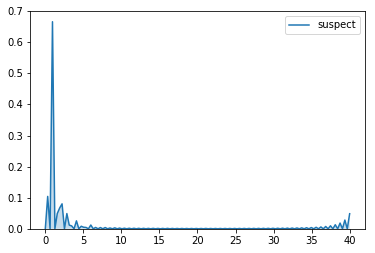

In [17]:
import seaborn as sns

_ = sns.kdeplot(dataPreparator_train.df_data['suspect'], shade=True)

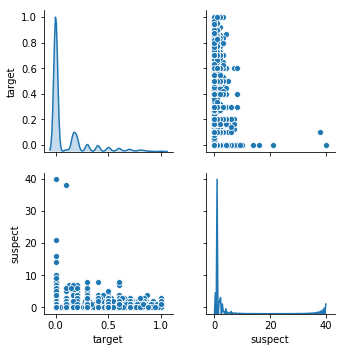

In [18]:
df = dataPreparator_train.df_data[['target','suspect']]
import seaborn as sns
sns.pairplot(df, diag_kind="kde")


Pearson coefficient between (target,suspect) = -0.010544239859546237


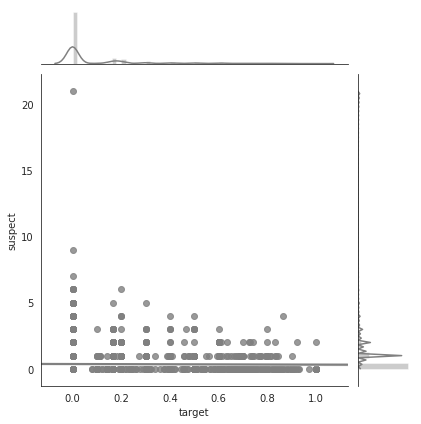

In [54]:
import scipy

import p3_util_plot

var1 = 'target'
var2 = 'suspect'

pearson = scipy.stats.pearsonr(df[var1],df[var2])
print("\nPearson coefficient between ({},{}) = {}".format(var1,var2, pearson[0]))

#p3_util_plot.df_sns_joint_plot(df_train_sample, var1, var2, parameter_kind='reg', parameter_color='grey')
p3_util_plot.df_sns_joint_plot(df, var1, var2, parameter_color='grey')


Figure above shows that there is no linear relation between replaced words with `target` and toxicity.

In [ ]:
df.

In [71]:
len(df_train.loc[:10])

476665

In [72]:
help(df_train.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - A ``callable`` function with one argument (the calling Series, DataFrame
 |    or Panel) and that returns valid output for indexing (one of the above)
 |  
 |  See more at :ref:`Selection 

In [20]:
df[df.target>0.9].sample(3)

,target,suspect
19592,1.0,1
342,1.0,0
5472,1.0,0


In [30]:
doc = dataPreparator_train.df_data.loc[342].docs
print(doc)

america , like santiago 's great fish , is now inert and being circled by sharks : russia , china , north korea .   this time , unlike any time since the civil war , it 's existential .   and who do we have protecting our way of life ?   i 'd say the keystone kops , but they actually always   got their man .   this crew is better described by macbeth :   " . . . a tale , told by an idiot , full of sound and fury , and signifying nothing . "


In [46]:
print(df_train.iloc[342].X)

america, like santiago's great fish, is now inert and being circled by sharks: russia, china, north korea.  this time, unlike any time since the civil war, it's existential.  and who do we have protecting our way of life?  i'd say the keystone kops, but they actually always  got their man.  this crew is better described by macbeth:  ". . . a tale, told by an idiot, full of sound and fury, and signifying nothing."


In [28]:
dataPreparator_train.df_data.loc[342].tokens

['america',
 'like',
 'santiago',
 'great',
 'fish',
 'inert',
 'circle',
 'shark',
 'russia',
 'china',
 'north',
 'korea',
 '  ',
 'time',
 'unlike',
 'time',
 'civil',
 'war',
 'existential',
 '  ',
 'protect',
 'way',
 'life',
 '  ',
 'keystone',
 'kop',
 'actually',
 '  ',
 'get',
 'man',
 '  ',
 'crew',
 'better',
 'describe',
 'macbeth',
 '  ',
 'tale',
 'tell',
 'idiot',
 'sound',
 'fury',
 'signify']

In [103]:
a = np.zeros(0)
isinstance(a, type(a).mro()[0])

True

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

ser = pd.Series(doc)
ser
ngram_range=(1,1)
max_features = 500
countVectorizer = CountVectorizer(ngram_range=ngram_range, max_features=max_features)

In [36]:
import p9_util
tfidf_vectorizer, csr_matrix=p9_util.tfidf_vectorization(ser, vectorizer = None,   
                    ngram_range=(1, 1)\
                    , max_features=500)


Fit vectorizer pipeline...
Transform data with vectorizer...


In [68]:
dict_params = tfidf_vectorizer.get_params()
print(dict_params)
print("\nMemory= {}".format(dict_params['memory']))
tfidfTransformer = dict_params['tfidftransformer']
countVectorizer = dict_params['countvectorizer']

{'memory': None, 'steps': [('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)), ('tfidftransformer', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True))], 'verbose': False, 'countvectorizer': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, 

In [67]:
print(countVectorizer.get_feature_names())
len(countVectorizer.vocabulary_)

['actually', 'always', 'america', 'an', 'and', 'any', 'being', 'better', 'but', 'by', 'china', 'circled', 'civil', 'crew', 'described', 'do', 'existential', 'fish', 'full', 'fury', 'got', 'great', 'have', 'idiot', 'inert', 'is', 'it', 'keystone', 'kops', 'korea', 'life', 'like', 'macbeth', 'man', 'north', 'nothing', 'now', 'of', 'our', 'protecting', 'russia', 'santiago', 'say', 'sharks', 'signifying', 'since', 'sound', 'tale', 'the', 'their', 'they', 'this', 'time', 'told', 'unlike', 'war', 'way', 'we', 'who']


59

In [66]:
tfidfTransformer.idf_.shape

(59,)

In [60]:
dir(countVectorizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_sort_features',
 '_stop_words_id',
 '_validate_custom_analyzer',
 '_validate_params',
 '_validate_vocabulary',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 'dtype',
 'encoding',
 'fit',
 'fit_transform',
 'fixed_vocabulary_',
 'get_feature_names',
 'get_params',
 'get_stop_words',
 'input',
 'inverse_transf

# <font color=blus>4. Dataset evaluation with linear regressor</font>

## <font color=blus>4.1. Loading train  and valid `DataPreparator` </font>

In [20]:
ls -alrth ./data/DataPreparator_*.dump

-rw-r--r-- 1 bangui bangui 133M août  19 20:44 ./data/DataPreparator_train.dump
-rw-r--r-- 1 bangui bangui 134M août  19 20:44 ./data/DataPreparator_test.dump
-rw-r--r-- 1 bangui bangui 137M août  23 00:43 ./data/DataPreparator_train_spacy_20000.dump
-rw-r--r-- 1 bangui bangui 137M août  23 01:35 ./data/DataPreparator_test_spacy_20000.dump
-rw-r--r-- 1 bangui bangui 339M août  26 22:57 ./data/DataPreparator_train_spacy_15000.dump
-rw-r--r-- 1 bangui bangui 339M août  26 23:32 ./data/DataPreparator_test_spacy_15000.dump
-rw-r--r-- 1 bangui bangui 1,5G août  30 17:08 ./data/DataPreparator_valid_v2_spacy_5000.dump
-rw-r--r-- 1 bangui bangui 334M août  30 18:56 ./data/DataPreparator_train_v2_spacy_15000.dump
-rw-r--r-- 1 bangui bangui 334M août  30 19:57 ./data/DataPreparator_valid_v2_spacy_15000.dump


In [22]:
import numpy as np
import p5_util
filename_train = "./data/DataPreparator_train_spacy_20000.dump"
filename_valid = "./data/DataPreparator_test_spacy_20000.dump"

dataPreparator_train = p5_util.object_load(filename_train)
dataPreparator_valid = p5_util.object_load(filename_valid)
    
print("")
print("DataPretarator train lenth=  {}".format(len(dataPreparator_train)))
print("DataPretarator valid lenth=  {}".format(len(dataPreparator_valid)))


p5_util.object_load : fileName= ./data/DataPreparator_train_spacy_20000.dump
p5_util.object_load : fileName= ./data/DataPreparator_test_spacy_20000.dump

DataPretarator train lenth=  18360
DataPretarator valid lenth=  18370


In [7]:
dataPreparator_valid.df_data.sample(3)

,docs,target,tokens,counting,vector
4539,newsflash : they are n't the brightest bulbs...,0.861538,"[newsflash, , bright, bulb, chandelier, , ...",28,"[-0.032828365598458226, 0.04777491830991339, -..."
2523,"when suspect , a little town in southeast , go...",0.000000,"[suspect, little, town, southeast, get, big, c...",34,"[-0.013695103792548348, 0.02815327474146511, -..."
2813,period it 's wildlife management . period it...,0.000000,"[period, wildlife, management, , period, oil...",28,"[-0.039276977844742815, -0.012912559921052726,..."


In [12]:
X_valid,y_valid = dataPreparator_valid.transform(None,None)
X_valid.shape,y_valid.shape, type(X_valid), type(y_valid)


Clean already processed!

Counting column tokens already processed!

Already vectorized!


((4581, 300), (4581,), numpy.ndarray, numpy.ndarray)

## <font color=blus>4.2. Linear Regression validation </font>

In [91]:
#from sklearn.svm import LinearSVC
#from sklearn.svm import LinearSVR

import DataPreparator
X_train = None
y_train = None
X_valid = None
y_valid = None

df_data = DataPreparator.test_DataPreparation(X_train, y_train, X_valid, y_valid, \
                     dataPreparator_train.is_keras_vectorizer, \
                     dataPreparator_train._is_spacy_data_preparation,\
                     dataPreparator_train=dataPreparator_train,\
                     dataPreparator_valid=dataPreparator_valid,\
                     model_learning=LinearSVR)


Clean already processed!

Counting column tokens already processed!

Already vectorized!

Clean already processed!

Counting column tokens already processed!

Already vectorized!
 
Vectorization : Spacy / Scapy data preparation: True
R² Score= 0.162
 


/home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# <font color=blus>5. Text digitalization as a matrix</font>

    This process allows to keep, for all texts, all dimensions from word embedding.
    
    A text is represented with N tokens, and each token is embedded into a P dimensions space.
    
    Then a text will be represented as a NxP matrix.

## <font color=blus> 5.1. Load `DataPreparator` for train and validation datasets</font>

In [1]:
! ls -alrth ./data/DataPreparator_*.dump

-rw-r--r-- 1 bangui bangui 133M août  19 20:44 ./data/DataPreparator_train.dump
-rw-r--r-- 1 bangui bangui 134M août  19 20:44 ./data/DataPreparator_test.dump
-rw-r--r-- 1 bangui bangui 137M août  23 00:43 ./data/DataPreparator_train_spacy_20000.dump
-rw-r--r-- 1 bangui bangui 137M août  23 01:35 ./data/DataPreparator_test_spacy_20000.dump
-rw-r--r-- 1 bangui bangui 339M août  26 22:57 ./data/DataPreparator_train_spacy_15000.dump
-rw-r--r-- 1 bangui bangui 339M août  26 23:32 ./data/DataPreparator_test_spacy_15000.dump
-rw-r--r-- 1 bangui bangui 1,5G août  30 17:08 ./data/DataPreparator_valid_v2_spacy_5000.dump
-rw-r--r-- 1 bangui bangui 335M sept.  1 22:28 ./data/DataPreparator_valid_v2_spacy_15000.dump


In [1]:
n_sample = 15000

In [2]:
import numpy as np
import p5_util

filename_train = './data/DataPreparator_train_spacy_'+str(n_sample)+'.dump'

dataPreparator_train = p5_util.object_load(filename_train)
    
print("")
print("DataPretarator train lenth= {}".format(len(dataPreparator_train)))

dataPreparator_train.df_data.sample()

p5_util.object_load : fileName= ./data/DataPreparator_train_spacy_15000.dump


Using TensorFlow backend.
/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
W0903 14:17:56.114428 140088606914368 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0903 14:17:56.115427 140088606914368 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W0903 14:1


DataPretarator train lenth= 13623


,docs,tokens,counting,vector,target
1504,"how come , when obama was president it was fai...","[come, president, fair, good, thing, consisten...",19,"[-0.07137183079496026, 0.018980555136998496, 0...",0.833333


In [5]:
import numpy as np
import p5_util

filename_valid = './data/DataPreparator_test_spacy_'+str(n_sample)+'.dump'

dataPreparator_valid = p5_util.object_load(filename_valid)
    
print("")
print("DataPretarator valid lenth= {}".format(len(dataPreparator_valid)))

dataPreparator_valid.df_data.sample()

p5_util.object_load : fileName= ./data/DataPreparator_test_spacy_15000.dump


Using TensorFlow backend.
/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
W0903 13:25:57.865293 140598150010688 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0903 13:25:57.865873 140598150010688 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W0903 13:2


DataPretarator valid lenth= 13616


,docs,tokens,counting,vector,target
1859,pretty sure i said nothing of the sort - but w...,"[pretty, sure, say, sort, boil, mean, ownershi...",47,"[-0.24058713994920253, 0.09531937645748258, -0...",0.166667


## <font color=blus>5.2 Padding matrix elements up to max_row</font>

    DataPreparator_v2 inherites form DataPreparator services. In addition, such object allows 
    to digitalize each text as a matrix.
    
    When constructed, DataPreparator_v2 object uses list of tokens issued from tokenization process 
    into DataPreparator object in order to build a patrix for each tokenized text.
    
    Each matrix is structured as following : 
        * Number of rows : this is the number of tokens in a text;
        * Number of columns : this is the dimension of embedded tokens. Tokens are embedded 
        into Glove space integrated along with Spacy.
    
    All tokenized text are processed in a such way to have the same number of rows. This means, each 
    text is described with the same number of tokens. 
    Any tokenized text is then truncated or padded considering the max_row parameter.
    
    
    Inheritance of tokenization is achieved by providing to DataPreparator_v2 constructor the parameter 
    is_df_copied with value fixed to True.

In [3]:
import p9_util_spacy
help(p9_util_spacy.spacy_list_token_2_tensor)

Help on function spacy_list_token_2_tensor in module p9_util_spacy:

spacy_list_token_2_tensor(list_token_string, dict_token_coeff=None, is_matrix=False)
    Transforms a list of tokens into either a 2D matrix or a 1D matrix, 
    means, a vector.
    When token to vector transformation takes place, then :
        * List of token is firstly transformed into a 2D matrix; each token 
        from list is vectorized. Coordonates of any vector are weighted with 
        coefficients from dict_token_coeff, when not None. Such coefficient 
        may be TF-IDF values assigned to each token.
        * List of tokens vectorization is then achieved by summing any vector 
        coefficients over each column.
    
    
        2D matrix for each tokenized text
    
                      Text over        Text over
                      0th              Jth 
                      dimension        dimension
           Tokenized +----------+-----+---------+
             text    |          |     | 

### <font color=blus>5.2.1 Padding train matrix with `DataPreparator_v2`</font>

    Build object DataPreparator_v2 using data from DataPreparator.
    
    DataPreparator_v2 allows to apply more processes for corpus digitalization 
    then the one in DataPreparator.

In [3]:
import DataPreparator
import DataPreparator_v2

dataPreparator_v2_train = DataPreparator_v2.DataPreparator_v2(other=dataPreparator_train, \
                                                              is_df_copied=True,\
                                                             is_tfidf=False)

    The max number of rows, max_length, of digitalized tokens is updated in order to have all texts with same 
    number of digits.
    
    The max_length value is fixed considering length distribution into the dataset.
    
    Texts will be padded if the number of digits is greater then max_length.
    
    Texts will be truncated if the number of digits is less then max_length.
    Truncation is made based on first digits of a text.

In [4]:
print("Current Length of train dataset : {}".format(dataPreparator_v2_train.max_length))
dataPreparator_v2_train.max_length = 80
print("Updated Length of train dataset : {}".format(dataPreparator_v2_train.max_length))

Current Length of train dataset : 101
Updated Length of train dataset : 80


    Truncate or padd text matrix in a such way every matrix to have the same number of rows.
    
    This operation may take 30mn for 10K text...

In [5]:
dataPreparator_v2_train.build_padded_matrix()


build_padded_matrix : Tokens to tensor transformation...

build_padded_matrix : Padd / truncate transformation...


In [2]:
print(len(dataPreparator_v2_train))
print(dataPreparator_v2_train.df_data.columns)

NameError: name 'dataPreparator_v2_train' is not defined

`dataPreparator_v2_valid` is saved.

In [8]:
import dill
filename = './data/DataPreparator_train_v2_spacy_notfidf_'+str(n_sample)+'.dill'
p5_util.object_dump(dataPreparator_v2_train,filename)

### <font color=blus>5.2.2 Padding validation matrix with `DataPreparator_v2`</font>

`dataPreparator_v2_train` is loaded in order to update `dataPreparator_v2_valid`

In [6]:
len(dataPreparator_valid)

13616

In [7]:
import DataPreparator
import DataPreparator_v2

dataPreparator_v2_valid = DataPreparator_v2.DataPreparator_v2(other=dataPreparator_valid, is_df_copied=True)

In [8]:
dataPreparator_v2_valid.df_data.columns

Index(['tokens', 'counting', 'target'], dtype='object')

Update `dataPreparator_v2_valid` attributes : `max_length`, `xpca`

In [7]:
import p5_util
#filename = './data/DataPreparator_train_v2_spacy_'+str(n_sample)+'.dill'
filename = './data/DataPreparator_train_v2_spacy_notfidf_'+str(n_sample)+'.dill'

dataPreparator_v2_train = p5_util.object_load(filename)

p5_util.object_load : fileName= ./data/DataPreparator_train_v2_spacy_notfidf_15000.dill


In [9]:
print(dataPreparator_v2_valid.max_length)
dataPreparator_v2_valid.max_length = 80#dataPreparator_v2_train.max_length
print(dataPreparator_v2_valid.max_length)
print(dataPreparator_v2_valid.df_data.shape)
#dataPreparator_v2_valid.xpca = dataPreparator_v2_train.xpca

108
80
(13616, 3)


#### Following process below may takes time.... Around 30mn for 15K records.

In [10]:
dataPreparator_v2_valid.build_padded_matrix()


build_padded_matrix : Tokens to tensor transformation...

build_padded_matrix : Padd / truncate transformation...


In [14]:
print(n_sample)
print(dataPreparator_v2_valid.df_data.columns)

15000
Index(['tokens', 'counting', 'target', 'matrix_padded'], dtype='object')


#### Update decomposition operator

In [ ]:
dataPreparator_v2_valid.xpca = dataPreparator_v2_train.xpca

In [16]:
import p5_util
if True :
    #filename = './data/DataPreparator_valid_v2_spacy_2'+str(n_sample)+'.dill'
    filename = './data/DataPreparator_valid_v2_spacy_notfidf_'+str(n_sample)+'.dill'

    p5_util.object_dump(dataPreparator_v2_valid,filename)

In [13]:
print(dataPreparator_v2_train.df_data['target'][:10])
print(dataPreparator_v2_valid.df_data['target'][:10])


0    0.1
1    0.0
2    0.7
3    0.0
4    0.0
5    0.0
6    0.6
7    0.0
8    0.0
9    0.0
Name: target, dtype: float64
0    0.166667
1    0.600000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.400000
8    0.200000
9    0.000000
Name: target, dtype: float64


## <font color=blus>5.3. PCA analysis</font>

In [21]:
import p5_util
filename = './data/DataPreparator_train_v2_spacy_'+str(n_sample)+'.dill'
dataPreparator_valid_v2_spacy = p5_util.object_load(filename)

p5_util.object_load : fileName= ./data/DataPreparator_train_v2_spacy_15000.dill


In [24]:
matrix_padded = dataPreparator_valid_v2_spacy.df_data['matrix_padded'].iloc[200]

#matrix_padded = matrix_padded[:,270:300]

if False :
    matrix_padded = matrix_padded[:,:30]
matrix_padded.shape    

(80, 300)


*** Decomposition : TruncatedSVD


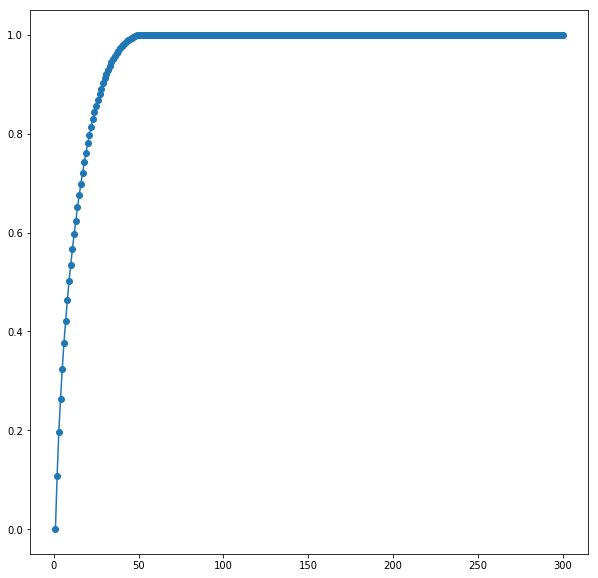

In [25]:
import pandas as pd
import p3_util_plot

if True :
        X_train_pca = p3_util_plot.df_pca_all_plot(pd.DataFrame(matrix_padded), plot=True)

## <font color=blus>5.4. Dimension reduction with decomposition algorihtm</font>

    A decomposition algorithm is used in order to select a reduced dimension that 
    explains a maximum variance.
    
    Decomposition algorithm is applied on the whole digitalized corpus.
    
    The new basis is then common to all digitalized token in texts.
    

In [2]:
n_sample = 15000

### <font color=blus>5.4.1. Dimension reduction for train dataset</font>

    First, decomposition algorithm is feeded with all 2D matrix, each of them representing a 
    digitalized tokenized text.
    
    Once done, decomposition transformation is applied on rows as a whole dataset.
    
    Hence, dimension is truncated ina such way explained variance reach close to 40%.

In [3]:
import p5_util
#filename = './data/DataPreparator_train_v2_spacy_'+str(n_sample)+'.dill'
filename = './data/DataPreparator_train_v2_spacy_notfidf_'+str(n_sample)+'.dill'

dataPreparator_v2_train = p5_util.object_load(filename)

p5_util.object_load : fileName= ./data/DataPreparator_train_v2_spacy_notfidf_15000.dill


Using TensorFlow backend.
/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
W0903 12:26:55.195185 140603500238656 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0903 12:26:55.195700 140603500238656 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W0903 12:2

`build_matrix_padded_truncated` : such function below is used in order avoid the whole data preparation process of `dataPreparator_v2_valid` object. 

This is due to the fact that this function has been added as a method of `DataPreparator_v2` afterwards.

In [4]:
batch_size=1000
percent_var = 0.60

dataPreparator_v2_train.build_matrix_padded_truncated(batch_size, percent_var)

(1089840, 300)13/13


In [5]:
dataPreparator_v2_train.df_data['matrix_padded_truncated'].iloc[12000].shape

(80, 39)

In [6]:
import p5_util
if True :
    #filename = './data/DataPreparator_train_v2_spacy_'+str(n_sample)+'.dill'
    filename = './data/DataPreparator_train_v2_spacy_notfidf_'+str(n_sample)+'.dill'

    p5_util.object_dump(dataPreparator_v2_train, filename)

In [1]:
import p3_util_plot
p3_util_plot.plot_pca_variance(dataPreparator_v2_train.xpca)

/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


NameError: name 'dataPreparator_v2_train' is not defined

### <font color=blus>5.4.2. Dimension reduction for validation dataset</font>

    Same process is applied that the one applied on train v2 dataset.
    
    Decomposition algorithm is copied from dataPreparator_v2_train into dataPreparator_v2_valid
    
    Then dimension truncation is applied to all digitalized texts.
    

In [3]:
import p5_util
filename = './data/DataPreparator_valid_v2_spacy_'+str(n_sample)+'.dill'
dataPreparator_v2_valid = p5_util.object_load(filename)

p5_util.object_load : fileName= ./data/DataPreparator_valid_v2_spacy_15000.dill


Using TensorFlow backend.
W0902 18:27:04.305432 140110865049408 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0902 18:27:04.306493 140110865049408 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W0902 18:27:04.322495 140110865049408 deprecation_wrapper.py:119] From /home/bangui/Dropbox/Perso/Formation/openclassrooms/OC_Datascientist/Kaggle/p8_util_config.py:137: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.



In [5]:
batch_size=1000
percent_var = 0.60

dataPreparator_v2_valid = build_matrix_padded_truncated(dataPreparator_v2_valid, batch_size, percent_var)

(1089280, 300)


In [6]:
dataPreparator_v2_valid.df_data.columns

Index(['counting', 'target', 'matrix_padded_truncated'], dtype='object')

In [9]:
import p5_util
filename = './data/DataPreparator_valid_v2_spacy_'+str(n_sample)+'.dill'
p5_util.object_dump(dataPreparator_v2_valid, filename)

In [7]:
print(len(dataPreparator_v2_valid))
print(dataPreparator_v2_valid.df_data.columns)
print(dataPreparator_v2_valid.df_data['matrix_padded_truncated'].iloc[12000].shape)
dataPreparator_v2_valid.xpca.get_params()

13616
Index(['counting', 'target', 'matrix_padded_truncated'], dtype='object')
(80, 39)


{'batch_size': 1000, 'copy': True, 'n_components': 300, 'whiten': False}

In [ ]:
print(dataPreparator_v2_train.df_data['target'][:10])
print(dataPreparator_v2_valid.df_data['target'][:10])

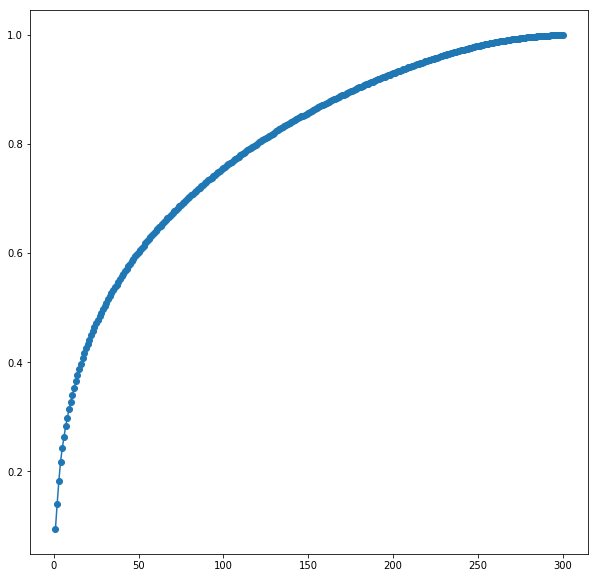

In [158]:
import p3_util_plot
p3_util_plot.plot_pca_variance(incrementalPCA)

    Get first components that do explain close to 40% of the variance.

# 6. Data preparation with `DataPreparator_v2` 

In [2]:
%load_ext autoreload
%autoreload 2

%reload_ext autoreload

## 6.1. Build of train and valid dataset 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train['comment_text'],df_train['target'],test_size=0.33, random_state=42)

print("Train dataset: X = {} Label= {}".format(X_train.shape, y_train.shape))
print("Test dataset:  X = {} Label= {}".format(X_test.shape,  y_test.shape))

In [5]:
import dill
import p5_util

filename = './data/X_y_train.dill'
p5_util.object_dump((X_train, y_train),filename)

In [6]:
import dill
import p5_util

filename = './data/X_y_valid.dill'
p5_util.object_dump((X_test, y_test),filename)

## 6.2. Data preparation with `DataPreparator_v2` with steps

## 6.2.1. Automated process configuration

In [10]:
#-------------------------------------------------------
# Parameters for DataPreparator_v2
#-------------------------------------------------------
dict_param_dataprep={
    'other' : None, \
    'slice_length' :10000, \
    'min_token_len':2, \
    'max_token_len':15,\
    'min_doc_len':5, \
    'max_doc_len':500,\
    'spacy_model_language' : 'en_core_web_md',\
    'tokenizer' : None,\
    'max_padding_length': 40,\
    'oov_keyword': "unknown",\
    'entity_keyword' : None,\
    'nb_word_most_frequent' : 100,\
    'is_df_copied' : False,\
    'is_tfidf' : False\
}

#-------------------------------------------------------
# Parameters for each digitalization step
#-------------------------------------------------------
filename = None

#-------------------------------------------------------
# In this step : 
#  * read file containing dataset
#  * sample of dataset
#-------------------------------------------------------
dict_step1={
    "dataset_filename":"./data/X_y",\
    "dict_param_dataprep" :dict_param_dataprep 
}

dict_step2 = {
    "dataprep_step_filename":filename,
    "dict_param_dataprep" :dict_param_dataprep 
}

ipca_batch_size=300
percent_var = 0.8
dict_step3 = {
"dataprep_step_filename":filename,\
"dict_param_dataprep" :dict_param_dataprep ,\
'ipca_batch_size' : ipca_batch_size,\
'percent_var' : percent_var,\
'xpca' : None,\
}

#-------------------------------------------------------
# Parameters for digitalization steps sequences
# This is the description of the automated process.
#-------------------------------------------------------
dict_param_step={
    1 : dict_step1,\
    2 : dict_step2,\
    3 : dict_step3,\
}

#-------------------------------------------------------
# Parameters for the global process, means , values 
# that remain same, whatever the step of the 
# digitalisation process.
#-------------------------------------------------------
dict_param_sequence={
    'step' : 2,\
    'step_end' : 2,\
    "previous_step_file_name":"./data/DataPreparator_v2_40Tokens_spacy_train_50000_step1.dill",\
    'dict_param_step' : dict_param_step,\
    "data_type":"train",\
    "root_file_name":"./data/DataPreparator_v2_40Tokens_spacy",\
    "n_sample":50000,\
    "file_format":".dill",\
}


## 6.2.2. Automated process application 

In [ ]:
import test_datapreparator
filename = test_datapreparator.dataprepatator_sequence_process(dict_param_sequence)


Step : 2
p5_util.object_load : fileName= ./data/DataPreparator_v2_40Tokens_spacy_train_50000_step1.dill

build_padded_matrix : Tokens to tensor transformation...

build_padded_matrix : Padd / truncate matrix rows...


    Display explained variance from PCA operator issued from process.

p5_util.object_load : fileName= ./data/DataPreparator_v2_40Tokens_spacy_valid_500.dill


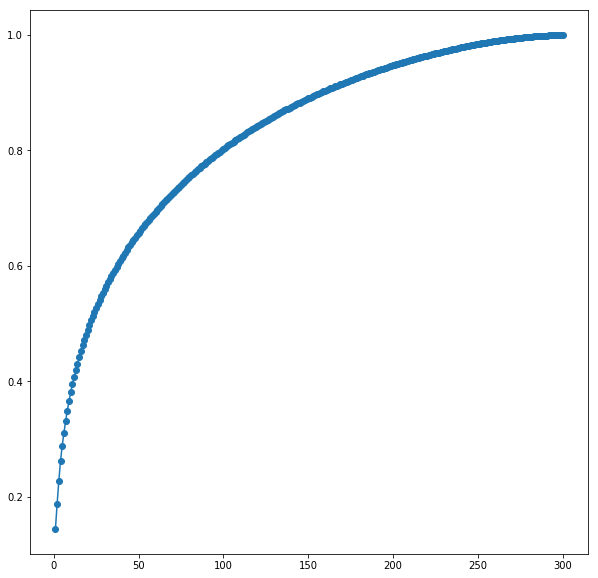

In [19]:
import p5_util
filename='./data/DataPreparator_v2_40Tokens_spacy_valid_500.dill'
dataPreparator_v2 = p5_util.object_load(filename)

import p3_util_plot
p3_util_plot.plot_pca_variance(dataPreparator_v2.xpca)

In [20]:
import p3_util_plot
p3_util_plot.get_component_from_cum_variance(dataPreparator_v2.xpca, percent_var)

98

## 6.2.3. Last step for validation dataset preparation

    Steps are same except for last step, dimension reduction.
    
    PCA Operator used for validation dataset is the one built for train dataset.
    

In [51]:
!ls -alrth ./data/DataPreparator_train*.dill

-rw-r--r-- 1 bangui bangui 615M sept.  2 18:21 ./data/DataPreparator_train_v2_spacy_15000.dill
-rw-r--r-- 1 bangui bangui 2,8G sept.  3 15:34 ./data/DataPreparator_train_v2_spacy_notfidf_15000.dill
-rw-r--r-- 1 bangui bangui 418M sept.  4 01:16 ./data/DataPreparator_train_v2_spacy_notfidf_1_20000.dill
-rw-r--r-- 1 bangui bangui 3,6G sept.  4 11:41 ./data/DataPreparator_train_v2_spacy_notfidf_2_20000.dill
-rw-r--r-- 1 bangui bangui 773M sept.  4 13:57 ./data/DataPreparator_train_v2_spacy_notfidf_20000.dill


In [78]:
import p5_util
filename = "./data/DataPreparator_train_v2_spacy_notfidf_20000.dill"
DataPreparator_train_v2 = p5_util.object_load(filename)

p5_util.object_load : fileName= ./data/DataPreparator_train_v2_spacy_notfidf_20000.dill


In [79]:
xpca = DataPreparator_train_v2.get_params()['xpca']

In [83]:
filename = None

ipca_batch_size=300
percent_var = 0.6
dict_step3 = {
"dataprep_step_filename":filename,\
"dict_param_dataprep" :dict_param_dataprep ,\
'ipca_batch_size' : ipca_batch_size,\
'percent_var' : percent_var,\
'xpca' : xpca,\
}

#-------------------------------------------------------
# Parameters for digitalization steps sequences
#-------------------------------------------------------
dict_param_step={
    1 : dict_step1,\
    2 : dict_step2,\
    3 : dict_step3,\
}

#-------------------------------------------------------
# Parameters for the global process, means , values 
# that remain same, whatever the step of the 
# digitalisation process.
#-------------------------------------------------------
dict_param_sequence={
    'step' : 3,\
    'step_end' : 3,\
    "previous_step_file_name":"./data/DataPreparator_v2_spacy_valid_1000_step2.dill",\
    'dict_param_step' : dict_param_step,\
    "data_type":"valid",\
    "root_file_name":"./data/DataPreparator_v2_spacy",\
    "n_sample":1000,\
    "file_format":".dill",\
}


In [85]:
import test_datapreparator
filename = test_datapreparator.dataprepatator_sequence_process(dict_param_sequence)


Step : 3
p5_util.object_load : fileName= ./data/DataPreparator_v2_spacy_valid_1000_step2.dill

Step : 3 Save data-preparation into file ./data/DataPreparator_v2_spacy_valid_1000.dill


p5_util.object_load : fileName= ./data/DataPreparator_v2_spacy_valid_1000.dill


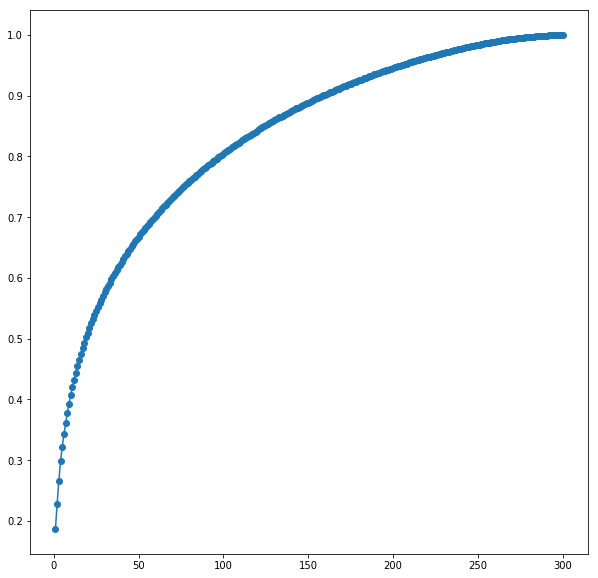

In [82]:
import p5_util
dataPreparator_v2 = p5_util.object_load(filename)

import p3_util_plot
p3_util_plot.plot_pca_variance(dataPreparator_v2.xpca)

In [ ]:
import p3_util_plot
p3_util_plot.get_component_from_cum_variance(dataPreparator_v2.xpca, 0.6)